# Problem Statements
 *  The leading causes of deaths among police officers
 *  The state with the most number of deceased officers
 *  The leading cause of death in that region
 *  The most common cause of death amongst K-9 officers
  

# Importing the Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Importing and exploring the Dataset

In [2]:
police_df =  pd.read_csv('police_deaths_in_america.csv')

In [3]:
police_df.head()

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State,K9_Unit
0,Constable,Darius Quimby,Stabbed,"Monday, January 3, 1791",1791,January,Monday,"Albany County Constable's Office, NY",New York,0
1,Sheriff,Cornelius Hogeboom,Gunfire,"Saturday, October 22, 1791",1791,October,Saturday,"Columbia County Sheriff's Office, NY",New York,0
2,Deputy Sheriff,Isaac Smith,Gunfire,"Thursday, May 17, 1792",1792,May,Thursday,"Westchester County Sheriff's Department, NY",New York,0
3,Marshal,Robert Forsyth,Gunfire,"Saturday, January 11, 1794",1794,January,Saturday,United States Department of Justice - United S...,United States,0
4,Deputy Sheriff,Robert Berwick,Gunfire,"Thursday, June 29, 1797",1797,June,Thursday,"New York County Sheriff's Office, NY",New York,0


In [4]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            26269 non-null  object
 1   Name            26269 non-null  object
 2   Cause_of_Death  26269 non-null  object
 3   Date            26269 non-null  object
 4   Year            26269 non-null  int64 
 5   Month           26269 non-null  object
 6   Day             26269 non-null  object
 7   Department      26269 non-null  object
 8   State           26269 non-null  object
 9   K9_Unit         26269 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.0+ MB


In [5]:
police_df.columns

Index(['Rank', 'Name', 'Cause_of_Death', 'Date', 'Year', 'Month', 'Day',
       'Department', 'State', 'K9_Unit'],
      dtype='object')

In [6]:
police_df.index

RangeIndex(start=0, stop=26269, step=1)

In [7]:
# checking for data uniqueness constraint in the cause of death and state columns
print('The cause_of_deaths column has '  +str(len(police_df['Cause_of_Death'].unique())) + ' unique values ')
print('The State column has '  +str(len(police_df['State'].unique())) + ' unique values ')

The cause_of_deaths column has 37 unique values 
The State column has 58 unique values 


In [8]:
# The state column has more than 50 unique values this should be checked 
police_df['State'].unique()

array(['New York', 'United States', 'South Carolina', 'Pennsylvania',
       'North Carolina', 'Kentucky', 'Maine', 'Maryland', 'Vermont',
       'Tennessee', 'Ohio', 'Virginia', 'Indiana', 'Massachusetts',
       'Alabama', 'Rhode Island', 'Connecticut', 'Missouri', 'Texas',
       'Georgia', 'Florida', 'Wisconsin', 'Arkansas', 'California',
       'Louisiana', 'Delaware', 'Utah', 'Illinois', 'Washington',
       'New Jersey', 'Michigan', 'Nevada', 'Colorado', 'Idaho', 'Oregon',
       'Arizona', 'Kansas', 'Iowa', 'Nebraska', 'New Mexico',
       'West Virginia', 'District of Columbia', 'Minnesota',
       'New Hampshire', 'Wyoming', 'Montana', 'Mississippi',
       'North Dakota', 'South Dakota', 'Oklahoma', 'Hawaii',
       'Puerto Rico', 'Alaska', 'Panama', 'U.S. Virgin Islands', 'Guam',
       'American Samoa', 'Northern Mariana Islands'], dtype=object)

In [9]:
# It turns out that the dataset contains data about the other US territories 
# Federal officer where represent as united states this is changed to federal
police_df.loc[police_df['State'] == 'United States' , 'State'] = 'Federal'

In [10]:
# converting the date column to datetime
police_df['Date'] = pd.to_datetime(police_df['Date'], errors='coerce')

In [11]:
# Since the data column is datetime drop the year and month columns 
police_df = police_df.drop(columns=['Year', 'Month'])

In [12]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Rank            26269 non-null  object        
 1   Name            26269 non-null  object        
 2   Cause_of_Death  26269 non-null  object        
 3   Date            26269 non-null  datetime64[ns]
 4   Day             26269 non-null  object        
 5   Department      26269 non-null  object        
 6   State           26269 non-null  object        
 7   K9_Unit         26269 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.6+ MB


# Data Visualization 

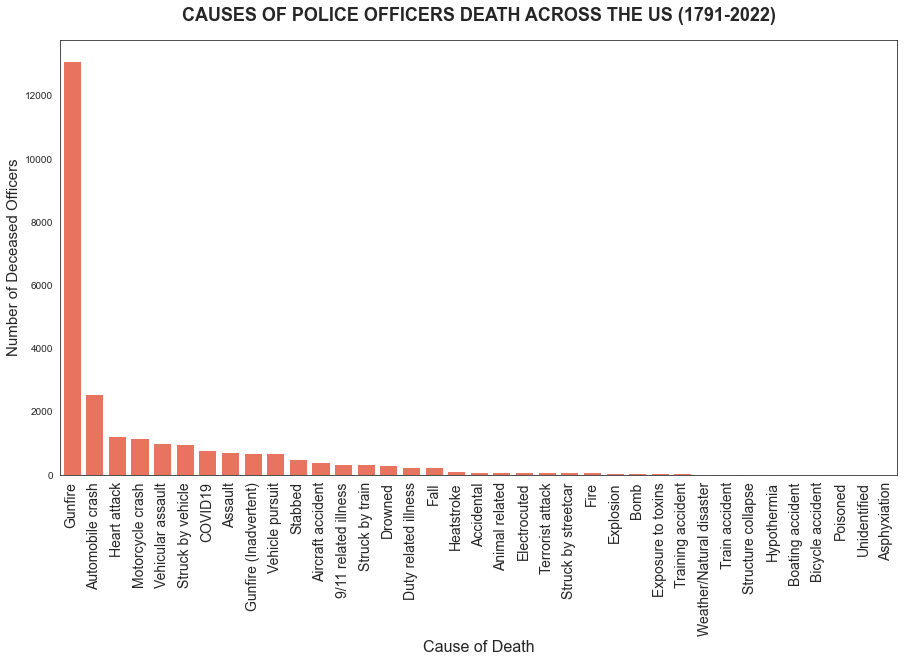

In [22]:
# Count plot of the Causes of Death
plt.figure(figsize=(15,8))
sns.set_style('white')
sns.countplot(x = 'Cause_of_Death',
            data = police_df,
            color = '#FF6347',
            order = police_df['Cause_of_Death'].value_counts().index )
plt.xticks(fontsize=14,rotation=90)
plt.xlabel('Cause of Death', fontsize = 16)
plt.ylabel('Number of Deceased Officers', fontsize = 15)
plt.title('Causes of Police Officers Death across the us (1791-2022)'.upper(),
            fontdict= { 'fontsize' : 18, 'fontweight' :'bold'},
            y = 1.03)
plt.show()

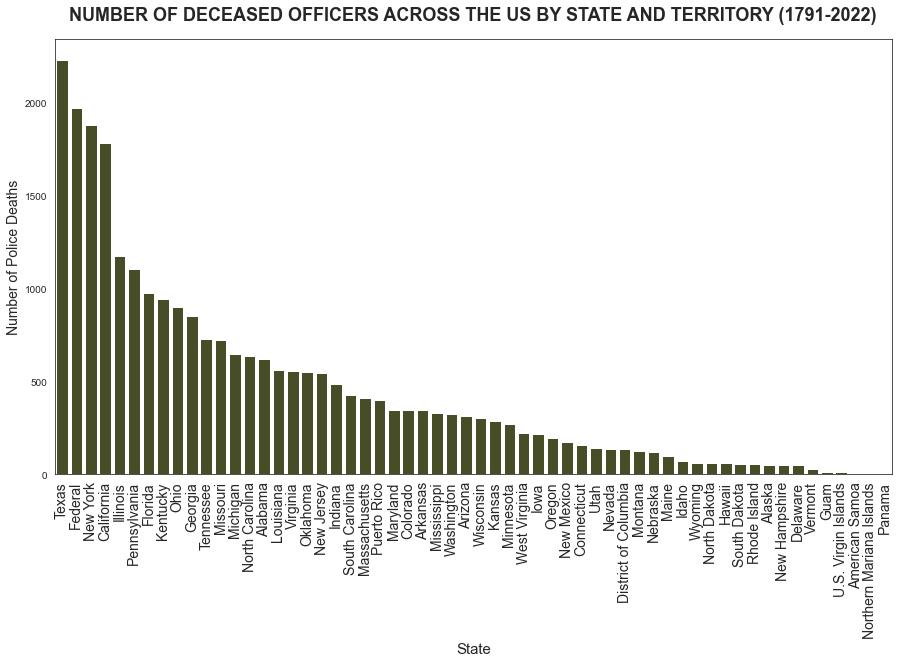

In [29]:
# Plot a count plot of the number of deaths in each state
plt.figure(figsize=(15,8))
sns.countplot(data = police_df,
            x = 'State',
            color = '#4b5320',
            order =  police_df['State'].value_counts().index
            )
plt.xticks(fontsize = 14, rotation = 90)
plt.ylabel('Number of Police Deaths', fontsize = 14)
plt.xlabel('State', fontsize = 15)
plt.title('Number of Deceased officers across the US by state and territory (1791-2022)'.upper(),
            fontdict= { 'fontsize' : 18, 'fontweight' :'bold'},
            y = 1.03 )
plt.show()

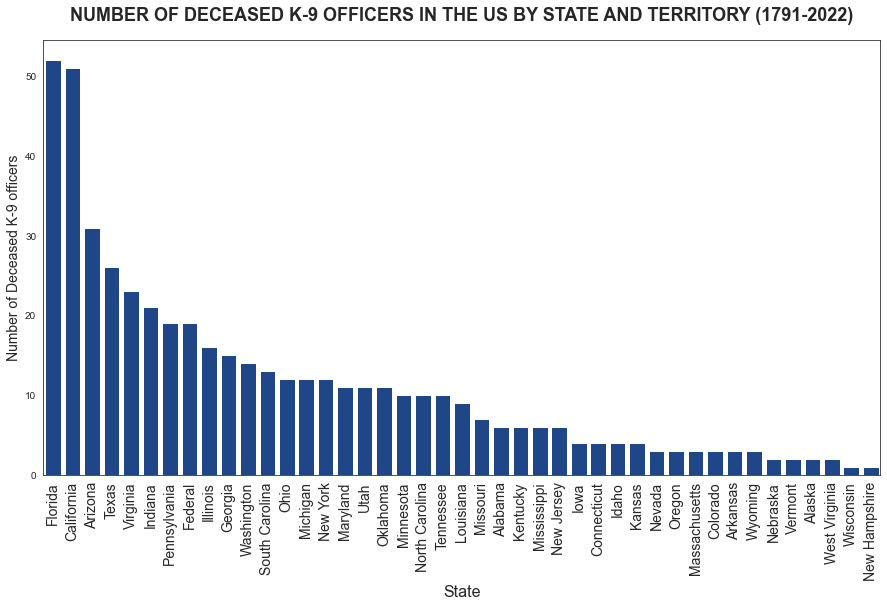

In [26]:
# Subset for the K9-Unit 
K9_Unit = police_df[police_df['K9_Unit'] == 1]

# Count plot of the number of Deceased K9s in each state 
plt.figure(figsize=(15,8))
sns.countplot(data = K9_Unit,
            x = 'State',
            color = '#0E4399',
            order = K9_Unit['State'].value_counts().index
            )
plt.xticks(fontsize = 14, rotation = 90)
plt.ylabel('Number of Deceased K-9 officers', fontsize = 14)
plt.xlabel('State', fontsize = 16)
plt.title('number of Deceased K-9 officers in the Us by state and territory (1791-2022)'.upper(),
            fontdict= { 'fontsize' : 18, 'fontweight' :'bold'},
            y = 1.03)
plt.show()

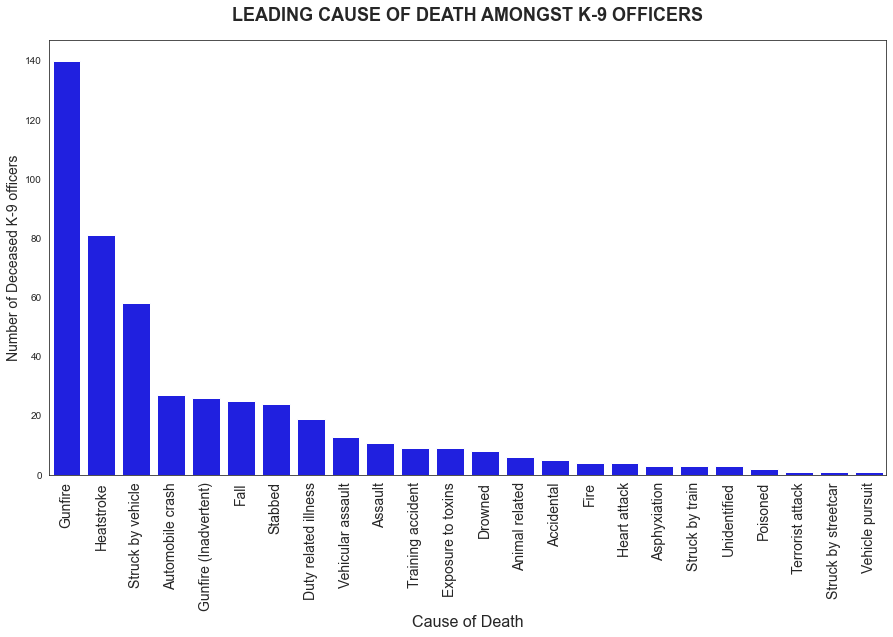

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(data = K9_Unit,
            x = 'Cause_of_Death',
            color = 'b',
            order = K9_Unit['Cause_of_Death'].value_counts().index
            )
plt.xticks(fontsize = 14, rotation = 90)
plt.ylabel('Number of Deceased K-9 officers', fontsize = 14)
plt.xlabel('Cause of Death', fontsize = 16)
plt.title('Leading Cause of Death Amongst K-9 Officers'.upper(),
            fontdict= { 'fontsize' : 18, 'fontweight' :'bold'},
            y = 1.03)
plt.show()